In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [129]:
df= pd.read_csv('./train_clean.csv')

In [130]:
# sincere_df = df[df['target'] == 0]
# insincere_df = df[df['target'] == 1]

# # Determine the minimum number of rows between the sincere and insincere DataFrames
# min_rows = min(len(sincere_df), len(insincere_df), 9000)

# # Sample the sincere and insincere DataFrames separately using the minimum number of rows as the sample size
# sincere_sample = sincere_df.sample(n=min_rows, random_state=42).head(4500)
# insincere_sample = insincere_df.sample(n=min_rows, random_state=42).head(4500)

# # Concatenate the sampled sincere and insincere DataFrames into a single DataFrame
# sample_df = pd.concat([sincere_sample, insincere_sample])
# sample = sample_df
# # Print the number of rows for each class in the resulting sample DataFrame
# print(sample_df['target'].value_counts())
df = df.sample(frac=1, random_state=42)

# Separate sincere and insincere questions
sincere_questions = df[df['target'] == 0]
insincere_questions = df[df['target'] == 1]

sincere_sample = sincere_questions.sample(n=30000, random_state=42)
insincere_sample = insincere_questions.sample(n=20000, random_state=42)

# Concatenate the samples into a new dataframe
sample_df = pd.concat([sincere_sample, insincere_sample])

# Shuffle the rows in the new dataframe
sample_df = sample_df.sample(frac=1, random_state=42)
sample = sample_df

# X = sample_df.drop('target', axis=1)
# y = sample_df['target']
# oversampler = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new dataframe with the oversampled data
# resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
# sample = resampled_df

In [131]:
X_train, X_test, y_train, y_test = train_test_split(sample['question_text'], sample['target'], test_size=0.2, random_state=42, stratify=sample['target'])

In [132]:
# define parameter grid for grid search cross-validation
grid = {'alpha':np.linspace(0,500,501)}
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
tfidf = vectorizer.fit_transform(X_train)
# no target y. Latent Semantic Analysis is unsupervised.
vocabulary = pd.Series(vectorizer.get_feature_names_out())

In [133]:
grid = {'alpha':np.linspace(0,1,101)}
NBayes = MultinomialNB()
NBayesCV = GridSearchCV(NBayes,
                        param_grid=grid,
                        return_train_score=True,
                        n_jobs=-1)
NBayesCV.fit(tfidf,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:629: FutureWarning: 

GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])},
             return_train_score=True)

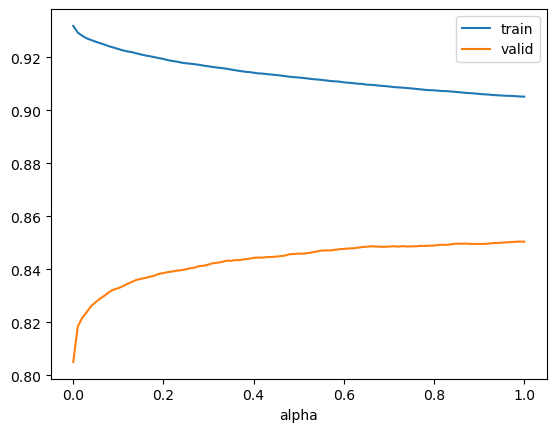

Naive Bayes validation rate: 0.85


In [134]:
results = pd.DataFrame()
results['alpha'] = grid['alpha']
results['train'] = NBayesCV.cv_results_['mean_train_score']
results['valid'] = NBayesCV.cv_results_['mean_test_score']
# results['baseline'] = 0.5
results.plot.line(x='alpha',y=['train','valid'])
plt.show()
acc_nbayes = NBayesCV.best_score_
print('Naive Bayes validation rate:',acc_nbayes.round(3))

In [135]:
a = NBayesCV.best_params_
word_counts = vectorizer.fit_transform(X_train)
vocabulary = vectorizer.get_feature_names_out()
a

{'alpha': 0.99}

In [136]:
nb = MultinomialNB(alpha=0.99)

nb.fit(tfidf, y_train)

vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', vocabulary=vocabulary)
tfidf_test = vectorizer.fit_transform(X_test)
# predict on the test data
y_pred = nb.predict(tfidf_test)

# show the prediction score
print('Prediction score:', nb.score(tfidf_test, y_test))

Prediction score: 0.8487


In [137]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      6000
           1       0.80      0.84      0.82      4000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.85      0.85      0.85     10000



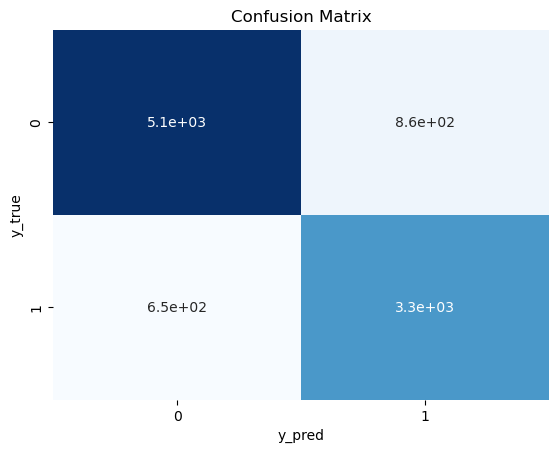

In [138]:
cm = metrics.confusion_matrix(y_test, y_pred)

ax = plt.gca()
sns.heatmap(cm, cmap='Blues', cbar=False, annot=True, xticklabels=y_test.unique(), yticklabels=y_test.unique(), ax=ax);
ax.set_xlabel('y_pred');
ax.set_ylabel('y_true');
ax.set_title('Confusion Matrix');

cr = metrics.classification_report(y_test, y_pred)
print(cr)